In [1]:
import os,sys
sys.path.insert(0, '../..')

In [2]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

from project.utils.dataframe_processor import create_dummies, drop_cols, load_csv, get_movie_id

In [3]:
df_rating = load_csv("../data/rating.csv")
df_movie = load_csv("../data/movie.csv")

new_movie_data = create_dummies(df_movie, 'genres', '|')
new_movie_data = pd.concat([df_movie, new_movie_data], axis = 1)
new_movie_data = drop_cols(new_movie_data, 'genres')

new_movie_data.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_rating = drop_cols(df_rating, 'timestamp')
df_rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [5]:
df = pd.merge(new_movie_data, df_rating, on="movieId", how="left")
df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3.0,4.0
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,6.0,5.0
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,8.0,4.0
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,10.0,4.0
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,11.0,4.5


In [6]:
df.columns

Index(['movieId', 'title', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'userId', 'rating'],
      dtype='object')

In [7]:
df = drop_cols(df, 'userId')
df = drop_cols(df, 'rating')
df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = df.drop_duplicates().reset_index()
df.columns

Index(['index', 'movieId', 'title', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [9]:
df = drop_cols(df, "index")
df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
genres = drop_cols(df, "movieId")
genres = drop_cols(df, "title")

In [11]:
genre_count = genres.sum(axis = 0, skipna = True)
genre_count

(no genres listed)      246
Action                 3520
Adventure              2329
Animation              1027
Children               1139
Comedy                 8374
Crime                  2939
Documentary            2471
Drama                 13344
Fantasy                1412
Film-Noir               330
Horror                 2611
IMAX                    196
Musical                1036
Mystery                1514
Romance                4127
Sci-Fi                 1743
Thriller               4178
War                    1194
Western                 676
dtype: int64

In [12]:
genre_count = pd.DataFrame(genre_count)
genre_count = genre_count.reset_index()
genre_count.rename({"index":"genres", 0:"count"}, axis=1, inplace=True)
genre_count = genre_count.sort_values(by="count", ascending=False)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

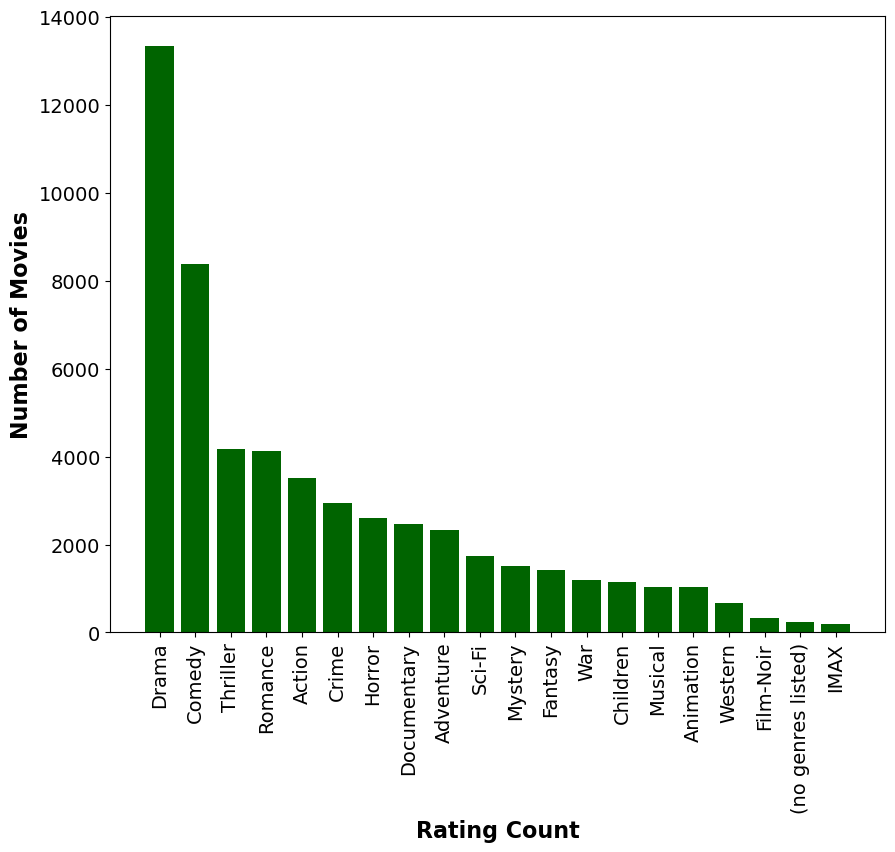

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(genre_count["genres"], genre_count["count"], color="darkgreen")
plt.ylabel("Number of Movies", fontsize=16, weight="bold")
plt.xlabel("Rating Count", fontsize=16, weight="bold")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

In [14]:
import wordcloud as wc

In [18]:
def group_indices(series,index="id"):
    d={}
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:
            d.setdefault(x[index],[])
            d[x[index]].append(i)
    return d

def get_groups(series,index="name"):
    s=set()
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:s.add(x[index])
    return list(s)

def multi_count(series,index="id"):
    return {k:len(v) for (k,v) in group_indices(series,index).items()}

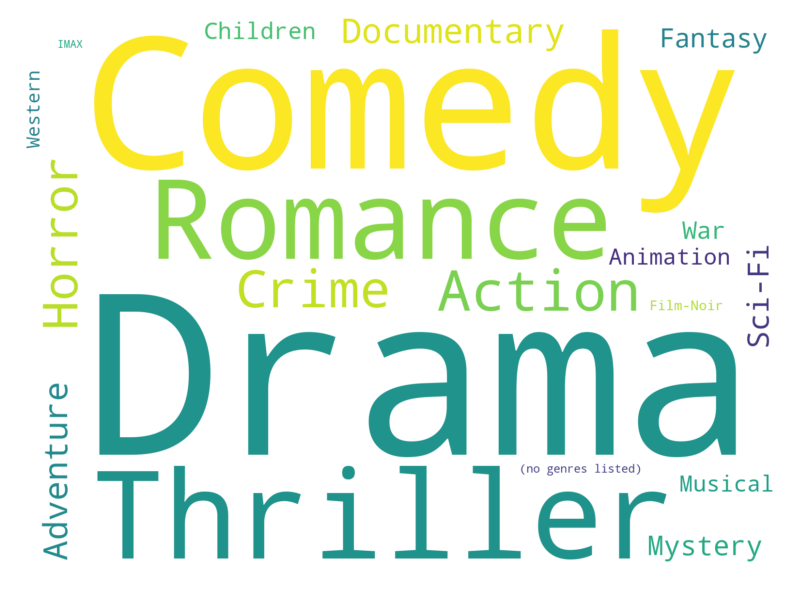

In [31]:
w=wc.WordCloud(background_color="white",margin=20,width=800,height=600,prefer_horizontal=0.7,max_words=50,scale=2)
data = dict(zip(genre_count['genres'].tolist(), genre_count['count'].tolist()))
wc_im = w.generate_from_frequencies(data)
plt.figure(figsize=(10, 10))
plt.imshow(wc_im, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
feature_cols = df.drop(['movieId', 'title'], axis=1)
X = feature_cols

In [11]:
X.shape

(27278, 20)

In [12]:
#Row corresponds to a movie name
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(X)

In [13]:
similarities

array([[1.        , 0.77459667, 0.31622777, ..., 0.4472136 , 0.        ,
        0.51639778],
       [0.77459667, 1.        , 0.        , ..., 0.57735027, 0.        ,
        0.66666667],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4472136 , 0.57735027, 0.        , ..., 1.        , 0.        ,
        0.57735027],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.51639778, 0.66666667, 0.        , ..., 0.57735027, 0.        ,
        1.        ]])

In [14]:
# output = df_movie.loc[:,['movieId','title']]
# output = output.join(pd.DataFrame(X))
# output

In [15]:
# output.columns

In [16]:
movie_title = "Toy Story"
movie_id = get_movie_id(df, movie_title) - 1

print(movie_id)
similarity_values = pd.Series(similarities[0])

Recommendations for Toy Story (1995): 

Here are the other related titles to your input: ['Toy Story 2 (1999)', 'Toy Story 3 (2010)', 'Toy Story of Terror (2013)', 'Toy Story Toons: Small Fry (2011)', 'Toy Story That Time Forgot (2014)', 'Toy Story Toons: Partysaurus Rex (2012)', 'Toy Story Toons: Hawaiian Vacation (2011)']
0


In [17]:
similarity_values

0        1.000000
1        0.774597
2        0.316228
3        0.258199
4        0.447214
           ...   
27273    0.447214
27274    0.447214
27275    0.447214
27276    0.000000
27277    0.516398
Length: 27278, dtype: float64

In [18]:
similarity_values.sort_values(ascending=False)


0        1.0
24458    1.0
11871    1.0
10114    1.0
13337    1.0
        ... 
12560    0.0
12559    0.0
12557    0.0
12556    0.0
13639    0.0
Length: 27278, dtype: float64

In [19]:
similar_movie_indexes = list(similarity_values.sort_values(ascending=False).index)
similar_movie_indexes[:5]

[0, 24458, 11871, 10114, 13337]

In [20]:
#Remove the already watched movie from index list
similar_movie_indexes.remove(movie_id)
similar_movie_indexes[:5]

[24458, 11871, 10114, 13337, 18274]

In [23]:
for i in range(len(similar_movie_indexes[:20])):
    movie_title = df[df.index == similar_movie_indexes[i]]["title"].values[0]
    print(f'{i+1}: {movie_title}')

1: Toy Story Toons: Hawaiian Vacation (2011)
2: Shrek the Third (2007)
3: DuckTales: The Movie - Treasure of the Lost Lamp (1990)
4: Tale of Despereaux, The (2008)
5: Asterix and the Vikings (Astérix et les Vikings) (2006)
6: Turbo (2013)
7: Monsters, Inc. (2001)
8: Emperor's New Groove, The (2000)
9: Adventures of Rocky and Bullwinkle, The (2000)
10: Toy Story 2 (1999)
11: Aladdin (1992)
12: Boxtrolls, The (2014)
13: Wild, The (2006)
14: Antz (1998)
15: Toy Story Toons: Small Fry (2011)
16: Brother Bear 2 (2006)
17: The Magic Crystal (2011)
18: Puss in Boots (Nagagutsu o haita neko) (1969)
19: The Lego Movie (2014)
20: Gnomeo & Juliet (2011)


In [22]:
for i in range(len(recommendations)):
    movie_name = base_df[base_df["movieId"] ==
                         recommendations[i]]["title"].values[0]
    print(f'{i+1}: {movie_name}')

return recommendations

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3027,3114,Toy Story 2 (1999),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3922,4016,"Emperor's New Groove, The (2000)",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15401,78499,Toy Story 3 (2010),0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
21981,106022,Toy Story of Terror (2013),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24458,115875,Toy Story Toons: Hawaiian Vacation (2011),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
24460,115879,Toy Story Toons: Small Fry (2011),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
25461,120468,Toy Story Toons: Partysaurus Rex (2012),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25463,120474,Toy Story That Time Forgot (2014),0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
